In [11]:
import math
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import random

from preprocessing import Preprocessor
from network import RNN

In [17]:
seq_len = 36
epochs = 1
batch_size = 256
alt_forecasting = False

pp = Preprocessor(train_path="datasets/no1_train.csv",
                    val_path="datasets/no1_validation.csv",
                    alt_forcasting=alt_forecasting)
train_df, val_df, X_feat = pp.preprocess()
rnn = RNN(seq_len=seq_len, num_feat=len(X_feat))

train_X = pp.df_to_x(train_df[X_feat], seq_len=seq_len, noise_percent=0.25)
train_Y = pp.df_to_y(train_df["y"], seq_len=seq_len)
val_X = pp.df_to_x(val_df[X_feat], seq_len=seq_len)
val_Y = pp.df_to_y(val_df["y"], seq_len=seq_len)


In [18]:
val_df.columns
val_df[["y", "y_with_struct_imb", "struct_imb"]]

,y,y_with_struct_imb,struct_imb
288,-0.280967,-0.280967,-0.142746
289,-0.294177,-0.294177,-0.167603
290,-0.287948,-0.287948,-0.190561
291,-0.306442,-0.306442,-0.212608
292,-0.338655,-0.338655,-0.234732
...,...,...,...
28131,-0.410741,-0.410741,-0.082871
28132,-0.413410,-0.413410,-0.059497
28133,-0.394465,-0.394465,-0.024063
28134,-0.412317,-0.412317,-0.148530


In [ ]:
rnn.train_model(train_X,
                train_Y,
                validation_data=(val_X, val_Y),
                epochs=epochs,
                batch_size=batch_size)

NameError: name 'alt_forcasting' is not defined

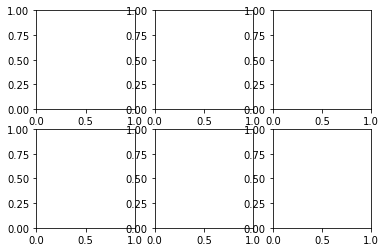

In [4]:
rnn.predict_multiple_series(x=val_X,
                            y=val_Y,
                            start=0,
                            steps_ahead=24,
                            num_series=6,
                            random_series=True,
                            alt_forecasting=alt_forecasting)